# 判決書資料分析
## 一、詞頻分析
        將每份判決書中每種詞頻紀錄在DataFrame中
        應用之一:
        將此DataFrame丟入機器學習或深度學習模型訓練
        
## 二、文字探勘分析
        圖為酒駕刑事案件的DataFrame(2019_0102.csv)，每一列為每一份判決書中所萃取出來的特徵值，
        特徵值(x): 對我們所關注的判刑月數(y)有影響的資料，ex: 酒精濃度、累犯次數、家庭背景等等，
        每一行的特徵值皆需要透過人工編碼或是文字探勘來取得。
   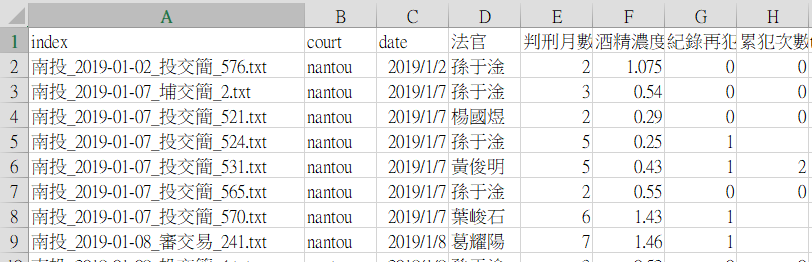
##  
        不同於深度學習計算過程中無法直觀解釋，
        ex:這裡的特徵值能解釋法官對什麼樣的犯罪行為及被告特質會有輕重判的傾向

# 文字探勘分析

## input:
        1.裁判書json檔
            下載來源: http://data.judicial.gov.tw/
        2.終結案件txt檔
            參照欄位說明word檔找到所需的欄位
            下載來源: https://data.gov.tw/datasets/search?qs=%E7%B5%82%E7%B5%90%E6%A1%88%E4%BB%B6


## 1.先將下載的json檔轉為txt檔方便往後閱讀與處理

In [275]:
import os
folders = os.listdir('./判決書json/201901')
print('共有',len(folders),'個法院資料夾')
print(folders[:5])

共有 154 個法院資料夾
['三重簡易庭刑事', '三重簡易庭民事', '中壢簡易庭刑事', '中壢簡易庭民事', '內湖簡易庭刑事']


### 處理json檔

In [263]:
#將全部json檔的路徑存進 files (list)
import json
import glob
path = 'D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json/'
files = glob.glob(path+'/*/*/*.json')
# 三個*各代表所有月份、所有法院、所有json檔
print('共有{}個json檔'.format(len(files)) )
files[:3]

共有150496個json檔


['D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\\201901\\三重簡易庭刑事\\SJEM,107,重秩聲,4,20190110,1.json',
 'D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\\201901\\三重簡易庭刑事\\SJEM,108,重秩,1,20190123,1.json',
 'D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\\201901\\三重簡易庭刑事\\SJEM,108,重秩,12,20190131,1.json']

In [228]:
file = files[1000]
with open(file,encoding= 'utf-8-sig') as f:
    f_json = json.load(f)
f_json

{'JID': 'NHEM,108,湖交簡,40,20190130,1',
 'JYEAR': '108',
 'JCASE': '湖交簡',
 'JNO': '40',
 'JDATE': '20190130',
 'JTITLE': '公共危險',
 'JFULL': '臺灣士林地方法院刑事簡易判決\u3000\u3000\u3000108年度湖交簡字第40號\r\n聲\u3000請\u3000人\u3000臺灣士林地方檢察署檢察官\r\n被\u3000\u3000\u3000告\u3000葉秉瓚\u3000\r\n\r\n\r\n列被告因公共危險案件，經檢察官聲請以簡易判決處刑（107年\r\n度偵字第17604號），本院判決如下：\r\n    主      文\r\n葉秉瓚駕駛動力交通工具，吐氣所含酒精濃度達每公升零點二五\r\n毫克以上，處有期徒刑\ue372月，如易科罰金，以新臺幣壹仟元折算\r\n壹日。\r\n    事實及理由\r\n一、本件犯罪事實及證據，均引用檢察官聲請簡易判決處刑書之\r\n    記載（如附件）。\r\n二、核被告所為，係犯刑法第185條之3第1項第1款之駕駛動力交\r\n    通工具而有吐氣所含酒精濃度達每公升零點二五毫克以上情\r\n    形罪。爰審酌酒後駕車足以造成注意能力減低，提高重大違\r\n    反交通規則之可能，政府一再宣導，已屬社會大眾難以容忍\r\n    寬宥之行為，被告對此應有認識，然卻毫無道路交通安全觀\r\n    念，竟仍貿然為之。兼衡被告被查獲後，經測得之吐氣所含\r\n    酒精濃度達每公升0.73毫克之犯罪情節，及被告前於民國\r\n    100年間，因不能安全駕駛致交通危險罪案件，經法院判處\r\n    罰金之素行，有臺灣高等法院前案紀錄表在卷可稽（見本院\r\n    卷第10頁），暨被告之智識程度、犯罪所生危害、犯後坦承\r\n    犯行之態度等一切情狀，量處如主文所示之刑，並諭知易科\r\n    罰金之折算標準，以示懲儆。\r\n三、依刑事訴訟法第449 條第1 項前段、第3 項、第454 條第2\r\n    項，刑法第185 條之3 第1 項第1 款、第41條第1 項前段，\r\n    刑法施行法第1 條之1 第1 項，逕以簡易判決處如主文所示\r\n    之

In [231]:
import re
def get_maintext(file,_type=None):
    ''' 輸出主文內容 '''
    if not _type:
        print('Error- miss 1 argument: maintent(file,_type= \'path\' or \'string\')')
        return
    if _type=='path':
        with open(file,encoding='utf-8-sig') as f:
            txt = f.read()
    else:  # 'string'
        txt = file
    txt = txt.replace(' ','').replace('\u3000','').replace('\n\n','\n').replace('\r','')
    if '\n主文\n' in txt:
        part = '\n主文\n'.join(txt.split('\n主文\n')[1:])
    else:
        return txt
    regex = '\\n\w{1,9}[^。]\\n' #[\u4e00-\u9fa5]中文字
    end = re.search(regex,part)
    if end:
        end_str = end[0]
        #print(end_str)
        maintext = part.split(end_str)[0]
        return maintext
    else:
        return '書記官'.join( part.split('書記官')[:-1])
    
cause = f_json['JTITLE'] #案由
full = f_json['JFULL'] #全文
print(get_maintext.__doc__)
print('\n')
main = get_maintext(full,'string') #主文
print(main)

 輸出主文內容 


葉秉瓚駕駛動力交通工具，吐氣所含酒精濃度達每公升零點二五
毫克以上，處有期徒刑月，如易科罰金，以新臺幣壹仟元折算
壹日。


In [220]:
def get_content(file,_type=None):
    ''' 輸出內文內容 '''
    if  _type !='path' and _type != 'string':
        print('Error- miss 1 argument: maintent(file,_type= \'path\' or \'string\')')
        return
    elif _type=='path':
        with open(file,encoding='utf-8-sig') as f:
            txt = f.read()
    elif _type =='string':
        txt = file
    txt = txt.replace(' ','').replace('\u3000','').replace('\n\n','\n').replace('\r','')
    txt2 = '書記官'.join( txt.split('書記官')[:-1])
    if '\n主文\n' in txt2:
        part = '\n主文\n'.join(txt2.split('\n主文\n')[1:])
    else:
        part = txt2
    #print(part)
    regex = '\\n\w{1,9}[^。]\\n' #[\u4e00-\u9fa5]中文字
    start = re.search(regex,part)
    #print(start)
    if start :
        start_str = start[0]
        #print(start_str)
        content = part.split(start_str)[1].replace('\n','')
        return content
    else:
        return part
content = get_content(full,_type='string') #內文
content

'一、本件犯罪事實及證據，均引用檢察官聲請簡易判決處刑書之記載（如附件）。二、核被告所為，係犯刑法第185條之3第1項第1款之駕駛動力交通工具而有吐氣所含酒精濃度達每公升零點二五毫克以上情形罪。爰審酌酒後駕車足以造成注意能力減低，提高重大違反交通規則之可能，政府一再宣導，已屬社會大眾難以容忍寬宥之行為，被告對此應有認識，然卻毫無道路交通安全觀念，竟仍貿然為之。兼衡被告被查獲後，經測得之吐氣所含酒精濃度達每公升0.73毫克之犯罪情節，及被告前於民國100年間，因不能安全駕駛致交通危險罪案件，經法院判處罰金之素行，有臺灣高等法院前案紀錄表在卷可稽（見本院卷第10頁），暨被告之智識程度、犯罪所生危害、犯後坦承犯行之態度等一切情狀，量處如主文所示之刑，並諭知易科罰金之折算標準，以示懲儆。三、依刑事訴訟法第449條第1項前段、第3項、第454條第2項，刑法第185條之3第1項第1款、第41條第1項前段，刑法施行法第1條之1第1項，逕以簡易判決處如主文所示之刑。四、本案經檢察官王碧霞聲請簡易判決處刑。中華民國108年1月30日內湖簡易庭法官古振暉以上正本證明與原本無異。如不服本判決，應於判決送達後10日內，向本院提出上訴狀（應附繕本），上訴於本院合議庭。中華民國108年1月30日'

### json檔搜尋器  
    可用json_container函數挑出特定多個json檔
    模擬這個搜尋功能
    https://law.judicial.gov.tw/FJUD/Default_AD.aspx

In [234]:
def read_json(file):
    with open(file,encoding= 'utf-8-sig') as f:
        f_json = json.load(f)
    cause = f_json['JTITLE'] #案由
    full = f_json['JFULL'] #全文
    main = get_maintext(full,'string') #主文
    content = get_content(full,'string') #內文
    return cause,full,main,content

#判斷單件判決書內容
def search_json(file,search_cause=None,search_main=None,search_content=None,model='part'):
    """
    search_json(file,search_cause=None,search_main=None,search_content=None,model='part' or 'full')
    file: json檔路徑
    search_cause: 案由完整名稱
    search_main: 主文內容
    search_content: 內文內容
    model:
        full-完全匹配
        part-至少一個匹配
    符合條件函數回傳file，不符合則回傳None
    """
    cause,full,main,content = read_json(file)
    input_num = 0
    match_num = 0
    onoff = False
    if search_cause:
        input_num = input_num + 1
        if search_cause == cause: #案由需要完全輸入正確
            match_num = match_num + 1
            onoff = True
    if search_main:
        input_num = input_num + 1
        if search_main in main:
            match_num = match_num + 1
            onoff = True
    if search_content:
        input_num = input_num + 1
        if search_content in content:
            match_num = match_num + 1
            onoff = True
    if model == 'full':
        if match_num == input_num and onoff:
            #print(match_num)
            return file
        else:
            return
    if onoff:
        #print(match_num,input_num)
        return file
    else:
        return
file = files[1000]
print( search_json(file,search_cause='公共危險',search_main='酒精濃度',search_content='吐氣',model='full') )
print( search_json(file,search_cause='公共危險',search_main='something',search_content='something',model='full') )
print( search_json(file,search_cause='公共危險',search_main='something',search_content='something') )
print( search_json(file,search_content='吐氣') )

D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\201901\內湖簡易庭刑事\NHEM,108,湖交簡,40,20190130,1.json
None
D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\201901\內湖簡易庭刑事\NHEM,108,湖交簡,40,20190130,1.json
D:/Google_NCKU_雲端硬碟/NCKU/法律共授/判決書json\201901\內湖簡易庭刑事\NHEM,108,湖交簡,40,20190130,1.json


In [235]:
# input多份判決書篩選
def json_container(path_list,search_cause=None,search_main=None,search_content=None,model='part'):
    if type(path_list) != list:
        print('first argument require list')
        return
    target=[]
    for it,file in enumerate(files):
        if it%1000 ==0:
            print(it,end=',')
        path = search_json(file ,search_cause ,search_main ,search_content ,model )
        if path: #path不等於None的話就存進target
            target.append(path)
    return target

#收集條件為案由是公共危險，主文內有酒精濃度的裁判書json檔
target = json_container(files,search_cause='公共危險',search_main='酒精濃度',model='full')

0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000,

In [236]:
len(target)

4658

In [238]:
#紀錄路徑清單
text = '\n'.join(target)
with open('D:/Google_NCKU_雲端硬碟/NCKU/法律共授/json酒駕清單.txt','w',encoding='utf-8-sig') as f:
    f.write(text)

### json檔內容轉存新的txt檔

In [259]:
#試做迴圈的第 1 round，確認ok後再執行完整迴圈
file = target[0]
print('原檔名:',file.split('\\')[-1])
#定義新檔名
court = file.split('\\')[2]
date = file.split(',')[-2]
year,month,day = date[:4],date[4:6],date[6:]
date = '-'.join([year,month,day])
kind = file.split(',')[2]
num = file.split(',')[3]
file_name = '_'.join( [court,date,kind,num] ) +'.txt' 
print('新檔名:',file_name)
cause,full,main,content= read_json(file)
text = '裁判案由：{}\n{}'.format(cause,full)
with open('D:/Google_NCKU_雲端硬碟/NCKU/法律共授/酒駕txt/'+file_name,'w',encoding='utf-8-sig') as f:
    f.write(text)

原檔名: NHEM,107,湖交簡,961,20190117,1.json
新檔名: 內湖簡易庭刑事_2019-01-17_湖交簡_961.txt


In [261]:
#儲存所有txt
for file in target:
    #file = target[0]
    #print('原檔名:',file.split('\\')[-1])
    #定義新檔名
    court = file.split('\\')[2]
    date = file.split(',')[-2]
    year,month,day = date[:4],date[4:6],date[6:]
    date = '-'.join([year,month,day])
    kind = file.split(',')[2]
    num = file.split(',')[3]
    file_name = '_'.join( [court,date,kind,num] ) +'.txt' 
    #print('新檔名:',file_name)
    cause,full,main,content= read_json(file)
    text = '裁判案由：{}\n{}'.format(cause,full)
    with open('D:/Google_NCKU_雲端硬碟/NCKU/法律共授/酒駕txt/'+file_name,'w',encoding='utf-8-sig') as f:
        f.write(text)

In [265]:
#看儲存結果
path= r'D:\Google_NCKU_雲端硬碟\NCKU\法律共授\酒駕txt\士林簡易庭刑事_2019-01-10_士交簡_13.txt'
with open(path,'r',encoding='utf-8-sig') as f:
    txt= f.read()
print(txt)

裁判案由：公共危險
臺灣士林地方法院刑事簡易判決　　　 108年度士交簡字第13號

聲　請　人　臺灣士林地方檢察署檢察官

被　　　告　彭俊仁

上列被告因公共危險案件，經檢察官聲請以簡易判決處刑（107

年度速偵字第1296號），本院判決如下：

    主  文

彭俊仁吐氣所含酒精濃度達每公升零點二五毫克以上而駕駛動力

交通工具，處有期徒刑月，如易科罰金，以新臺幣壹仟元折算

壹日。

    事實及理由

一、本件犯罪事實、證據及應適用之法條，均引用如附件檢察官

    聲請簡易判決處刑書之記載。

二、爰審酌被告彭俊仁明知酒精成分對人之意識能力具有不良影

    響，酒後駕車將危害行車安全，對一般往來之公眾有高度危

    險性，猶於酒後駕駛車輛上路，危害公眾安全，且被告前因

    公共危險案件，經法院判處罪刑在案，此有臺灣高等法院被

    告前案紀錄表在卷可按，竟仍不知悔改，再犯本罪，併考量

    其所駕駛之車輛種類與行駛之路段、呼氣酒精濃度，兼衡其

    生活狀況、智識程度及犯後坦承犯行之態度等一切情狀，量

    處如主文所示之刑，並諭知易科罰金之折算標準。

三、依刑事訴訟法第449 條第1項前段、第3項、第454條第2項，

    刑法第185 條之3第1項第1款、第41條第1項前段，刑法施行

    法第1條之1第1項，逕以簡易判決處刑如主文。

中    華    民    國   108    年    1     月    10    日

                  士林簡易庭  法  官  楊峻宇

以上正本證明與原本無異。

如不服本判決應於收受本判決後10日內向本庭提出上訴書狀（須

附繕本）。

中    華    民    國   108    年    1     月    10    日

                              書記官  蘇彥宇

附錄：本案論罪科刑法條全文

刑法第185條之3

駕駛動力交通工具而有下列情形之一者，處2 年以下有期徒刑，

得併科20萬元以下罰金：

一、吐氣所含酒精濃度達每公升零點二五毫克或血液中酒精濃度

    達百分之零點零五以上。

二、有前款以外之其他情事足認服用酒類或其他相類之物，致不

    能安全駕駛。

## 2.萃取特徵值

#### 大致上coding的流程:
    1.用正規表達式(re套件)或if else判斷式等等抓出目標詞(句) 
    2.匹配多個(多種)-->在大量文檔上print目標詞前後幾個字元-->確認哪些是需要的
    3.有不該抓的就改良抓取條件或split文檔字串-->再回到1.
    
    第1到第3步可能會重複執行幾次，直到能正確篩出特徵值資訊
    4.特徵值資料處理與儲存

In [158]:
import glob
files = glob.glob(r'D:\Google_NCKU_雲端硬碟\NCKU\法律共授\1022\酒駕txt\*.txt')
len(files),files[:3]

(4658,
 ['D:\\Google_NCKU_雲端硬碟\\NCKU\\法律共授\\1022\\酒駕txt\\內湖簡易庭刑事_2019-01-17_湖交簡_12.txt',
  'D:\\Google_NCKU_雲端硬碟\\NCKU\\法律共授\\1022\\酒駕txt\\內湖簡易庭刑事_2019-01-17_湖交簡_15.txt',
  'D:\\Google_NCKU_雲端硬碟\\NCKU\\法律共授\\1022\\酒駕txt\\內湖簡易庭刑事_2019-01-17_湖交簡_19.txt'])

In [2]:
%run tool.ipynb
print(tool.__doc__)


    read_txt ,get_maintext ,get_content ,read_json ,search_json ,json_container ,add_table ,one_accused ,one_accused_txt ,
    digit_maker ,drop_digit_para ,re_find_digits ,get_digits ,drug_cats ,re_trade_para ,re_sell_drug2 ,word_location ,
    


In [160]:
%run tool.ipynb #py檔模組用import , ipynb檔用 %run
file = files[426] 
print(file,'\n')
print(read_txt(file,1))

D:\Google_NCKU_雲端硬碟\NCKU\法律共授\1022\酒駕txt\臺灣南投地方法院刑事_2019-01-02_投交簡_576.txt 

裁判案由：公共危險
臺灣南投地方法院刑事簡易判決　　　107年度投交簡字第576號
聲　請　人　臺灣南投地方檢察署檢察官
被　　　告　陳彥廷


上列被告因公共危險案件，經檢察官聲請以簡易判決處刑（107
年度偵字第5342號），本院判決如下：
    主      文
陳彥廷駕駛動力交通工具而其血液中酒精濃度達百分之零點零五
以上，累犯，處有期徒刑伍月，如易科罰金，以新臺幣壹仟元折
算壹日。
    犯罪事實及理由
一、犯罪事實：
    陳彥廷於民國107年9月15日20、21時許，在其位於南投縣水
    里鄉友人住處飲用啤酒，明知飲用酒類後不能駕駛動力交通
    工具，猶基於酒後駕駛動力交通工具之犯意，於飲畢後之隔
    日凌晨某時許無照騎乘車牌號碼000-000號普通重型機車，
    自上揭飲酒處出發而行駛於道路上。嗣於同年9月16日0時55
    分許，行經南投縣○○鄉○○路000號前，因酒後無法安全
    操控其所駕駛之車輛，不慎自行摔倒而受傷並送醫。嗣經警
    據報前往處理，並委由竹山秀傳醫院對陳彥廷實施血液中酒
    精濃度測試後，於同年9月16日2時14分測得其血液中之酒精
    濃度值為215mg /dL（即百分之0.215），已達百分0.05以上
    ，始查悉上情。
二、認定犯罪事實所憑之證據及理由：
    上揭被告飲酒後騎乘機車肇事受傷送醫，嗣為警委託醫院對
    其抽血檢驗，測得其血液中酒精濃度值達215MG/DL（即百分
    之0.215），超過法規規定標準等事實，業據被告於警、偵
    詢時所坦承，復有南投縣政府警察局集集分局交通事故處理
    小組道路交通事故當事人酒精測定紀錄表（其上黏貼竹山秀
    傳醫院生化檢查報告）、道路交通事故現場圖、道路交通事
    故調查表（一）、道路交通事故調查報告表（二）、南投縣
    ○○○○○○○○○道路○○○○○○○○○○○號查詢機
    車駕駛人、車號查詢機車車籍等件及道路交通事故照片12張
    在卷可稽。足認被告之自白與事實相符，本件被告經測得血
    液中酒精濃度值為百分之0.215，已超

### 2.1 酒精濃度
找出酒駕判決書中酒精濃度測得多少，有吐氣跟血液兩種測法


In [145]:
import re
with open(file,encoding='utf-8-sig') as f:
    txt =f.read()
txt2 = txt.replace('\n','').replace('\u3000','').replace(' ','').replace(',','')
condition = [
    '\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*毫克\w*', # (0.53毫克)
    '\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*毫克\w*', #酒精濃度1毫克
    '\w*酒精濃度\w*百分之\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*',
    #'\w*酒精濃度\w*, 可任意註解掉不需要的正則條件
    '\w*酒精濃度\w*千分之\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*',
    '\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*mg[\w\/dL]{,3}',
    '\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*mg{,3}',
           ]
regex = '|'.join(condition)
print('正則表達式:',regex)
match = re.findall(regex,txt2)
match

正則表達式: \w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*毫克\w*|\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*毫克\w*|\w*酒精濃度\w*百分之\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*|\w*酒精濃度\w*千分之\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*|\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*mg[\w\/dL]{,3}|\w*酒精濃度\w*[\w（）\(\),、\<\>\[\]\-\.「」:：％]\w*mg{,3}


['主文陳彥廷駕駛動力交通工具而其血液中酒精濃度達百分之零點零五以上',
 '於同年9月16日2時14分測得其血液中之酒精濃度值為215mg/dL',
 '本件被告經測得血液中酒精濃度值為百分之0.215',
 '按刑法第185條之3第1項第1款後段之血液中酒精濃度達百分之0.05以上之要件',
 '吐氣所含酒精濃度達每公升0.25毫克或血液中酒精濃度達百分之0']

In [149]:
alcohols=[]
for i in match:
    alcohols.extend( get_digits(i,end = 'mg') )
    alcohols.extend( get_digits(i,end = '毫克') )
print(alcohols)

['215', '0.25']


In [151]:
print( match[3])
print( get_digits(match[3],end = '\w') ) #不指定

按刑法第185條之3第1項第1款後段之血液中酒精濃度達百分之0.05以上之要件
['185', '3', '1', '1', '0.05']


## 2.2 終結案件內的欄位資訊

In [152]:
print(file)
file_name = file.split('\\')[-1]
court = file_name.split('_')[0]
date = file_name.split('_')[1]
year = int(date.split('-')[0]) - 1911
kind = file_name.split('_')[2]
num = file_name.split('_')[3].split('.')[0]
information = '!'.join([court,str(year),kind,num])
print(information)

D:\Google_NCKU_雲端硬碟\NCKU\法律共授\1022\酒駕txt\臺灣南投地方法院刑事_2019-01-02_投交簡_576.txt
臺灣南投地方法院刑事!108!投交簡!576


透過 '法院別!民國年!字別!案號' \
可在終結案件txt檔找出對應的終結案件